# Importando bibliotecas

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Removendo ruidos do dataset

<strong>species =</strong> Especies</br>
<strong>island =</strong> Ilha</br>
<strong>bill_length_mm =</strong> Comprimento do bico</br>
<strong>bill_depth_mm =</strong> Profundidade do bico</br>
<strong>flipper_length_mm =</strong> Comprimento da nadadeira</br>
<strong>body_mass_g =</strong> Massa corporal</br>
<strong>sex =</strong> Sexo</br>

In [9]:
dataframe_penguins = pd.read_csv('penguins.csv')
# dataframe_penguins.shape # (n records, n columns)

# dataframe_penguins.describe()
# dataframe_penguins.values
# as colunas que não aparece provavelmente tem valores "incorretos"
# std = standart deviation, que é a variação entre os valores

print('\033[33mRemovendo ruido do dataset...\n\033[m')
# Remover todos os 'NaN' das colunas 
dataframe_penguins = dataframe_penguins.dropna(subset=['species', 'island', 'sex']) 

# Codificando cada valor único em um inteiro diferente.
dataframe_penguins['species'] = dataframe_penguins['species'].factorize()[0]
dataframe_penguins['island'] = dataframe_penguins['island'].factorize()[0]

# Agrupar por espécies e preencher NaN com a média de cada grupo
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataframe_penguins[cols] = dataframe_penguins.groupby(
    'species')[cols].transform(lambda x: x.fillna(x.mean()))

# Formatar as colunas numéricas com 3 casas decimais
dataframe_penguins[cols] = dataframe_penguins[cols].applymap('{:.3f}'.format)

# Resetar o índice e manter a coluna 'sex' no final
dataframe_penguins = dataframe_penguins.reset_index(drop=True)[
    ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
dataframe_penguins.head(20)

Removendo ruido do dataset...



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.100,18.700,181.000,3750.000,MALE
1,0,0,39.500,17.400,186.000,3800.000,FEMALE
2,0,0,40.300,18.000,195.000,3250.000,FEMALE
3,0,0,36.700,19.300,193.000,3450.000,FEMALE
4,0,0,39.300,20.600,190.000,3650.000,MALE
5,0,0,38.900,17.800,181.000,3625.000,FEMALE
6,0,0,39.200,19.600,195.000,4675.000,MALE
7,0,0,41.100,17.600,182.000,3200.000,FEMALE
8,0,0,38.600,21.200,191.000,3800.000,MALE
9,0,0,34.600,21.100,198.000,4400.000,MALE


# Criando o modelo de treinamento

In [10]:
print('\033[33mCriando modelo da árvore de decisão...\033[m')
model = DecisionTreeClassifier()

Criando modelo da árvore de decisão...


# Plotando os gráficos

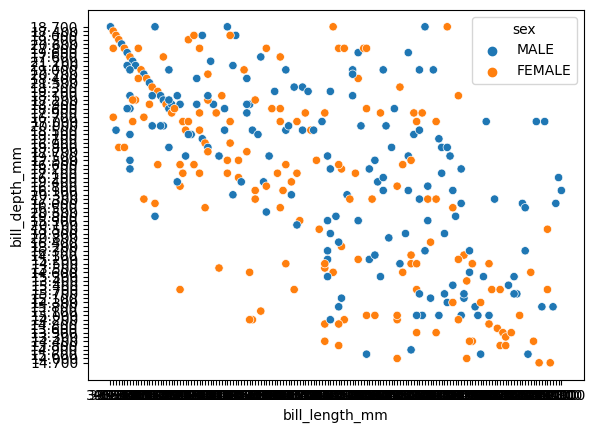

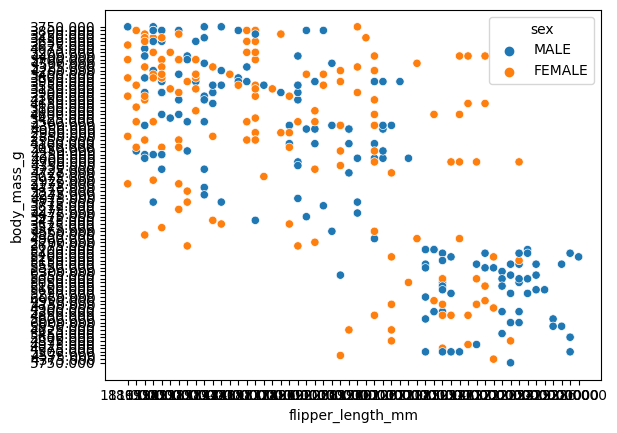

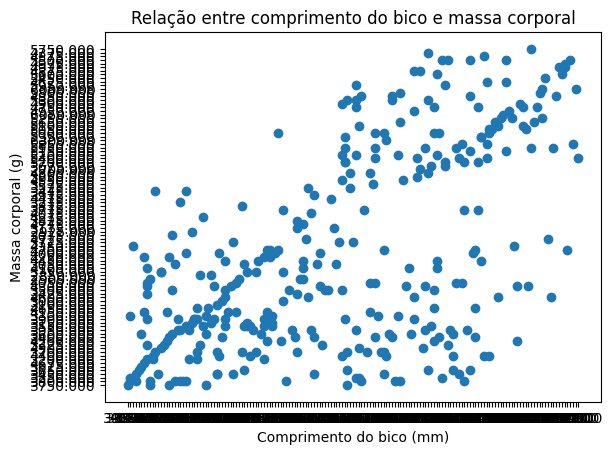

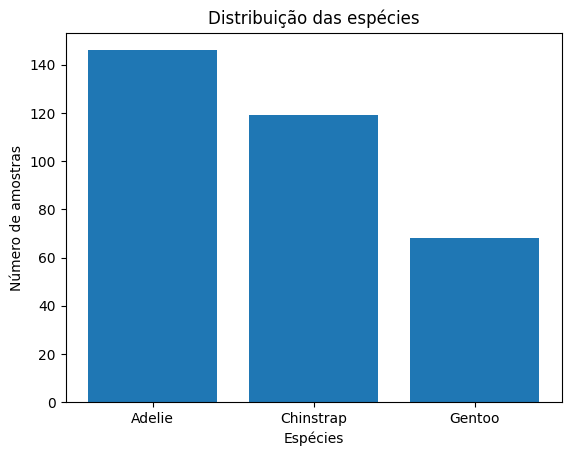

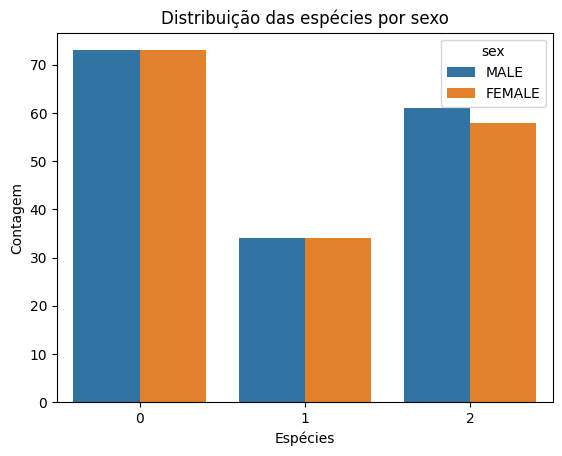

In [11]:
#Correlação 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm' e 'body_mass_g' com o sexo das espécies.

sns.scatterplot(data=dataframe_penguins, x='bill_length_mm', y='bill_depth_mm', hue='sex')
plt.show()

sns.scatterplot(data=dataframe_penguins, x='flipper_length_mm', y='body_mass_g', hue='sex')
plt.show()

# Gráfico de dispersão do comprimento do bico e massa corporal
plt.scatter(dataframe_penguins['bill_length_mm'], dataframe_penguins['body_mass_g'])
plt.xlabel('Comprimento do bico (mm)')
plt.ylabel('Massa corporal (g)')
plt.title('Relação entre comprimento do bico e massa corporal')
plt.show()

# Gráfico de barras da distribuição das espécies
species_counts = dataframe_penguins['species'].value_counts()
species_names = ['Adelie', 'Chinstrap', 'Gentoo']
plt.bar(species_names, species_counts)
plt.xlabel('Espécies')
plt.ylabel('Número de amostras')
plt.title('Distribuição das espécies')
plt.show()

sns.countplot(data=dataframe_penguins, x='species', hue='sex')
plt.title('Distribuição das espécies por sexo')
plt.xlabel('Espécies')
plt.ylabel('Contagem')
plt.show()

# Treinando

In [12]:
x = dataframe_penguins.drop(columns=['sex']) # entrada
y = dataframe_penguins['sex'] # saida
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # alocando 20% dos dados pra teste
# as primeiras vareaveis são a saida de treinamento, e as outras duas são a saida de test

model.fit(x_train, y_train)

DecisionTreeClassifier()

# Plotando a arvore de decisões

[Text(0.4814189189189189, 0.9615384615384616, 'Profundidade do bico <= 18.05\ngini = 0.498\nsamples = 266\nvalue = [125, 141]\nclass = MALE'),
 Text(0.30405405405405406, 0.8846153846153846, 'Massa corporal <= 4987.5\ngini = 0.447\nsamples = 160\nvalue = [106, 54]\nclass = FEMALE'),
 Text(0.20270270270270271, 0.8076923076923077, 'Comprimento do bico <= 48.45\ngini = 0.15\nsamples = 110\nvalue = [101, 9]\nclass = FEMALE'),
 Text(0.13513513513513514, 0.7307692307692307, 'Profundidade do bico <= 17.95\ngini = 0.123\nsamples = 106\nvalue = [99, 7]\nclass = FEMALE'),
 Text(0.08108108108108109, 0.6538461538461539, 'Especies <= 0.5\ngini = 0.094\nsamples = 101\nvalue = [96, 5]\nclass = FEMALE'),
 Text(0.05405405405405406, 0.5769230769230769, 'Massa corporal <= 3712.5\ngini = 0.198\nsamples = 45\nvalue = [40, 5]\nclass = FEMALE'),
 Text(0.02702702702702703, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]\nclass = FEMALE'),
 Text(0.08108108108108109, 0.5, 'Comprimento do bico <= 39.6\ngini = 0.4

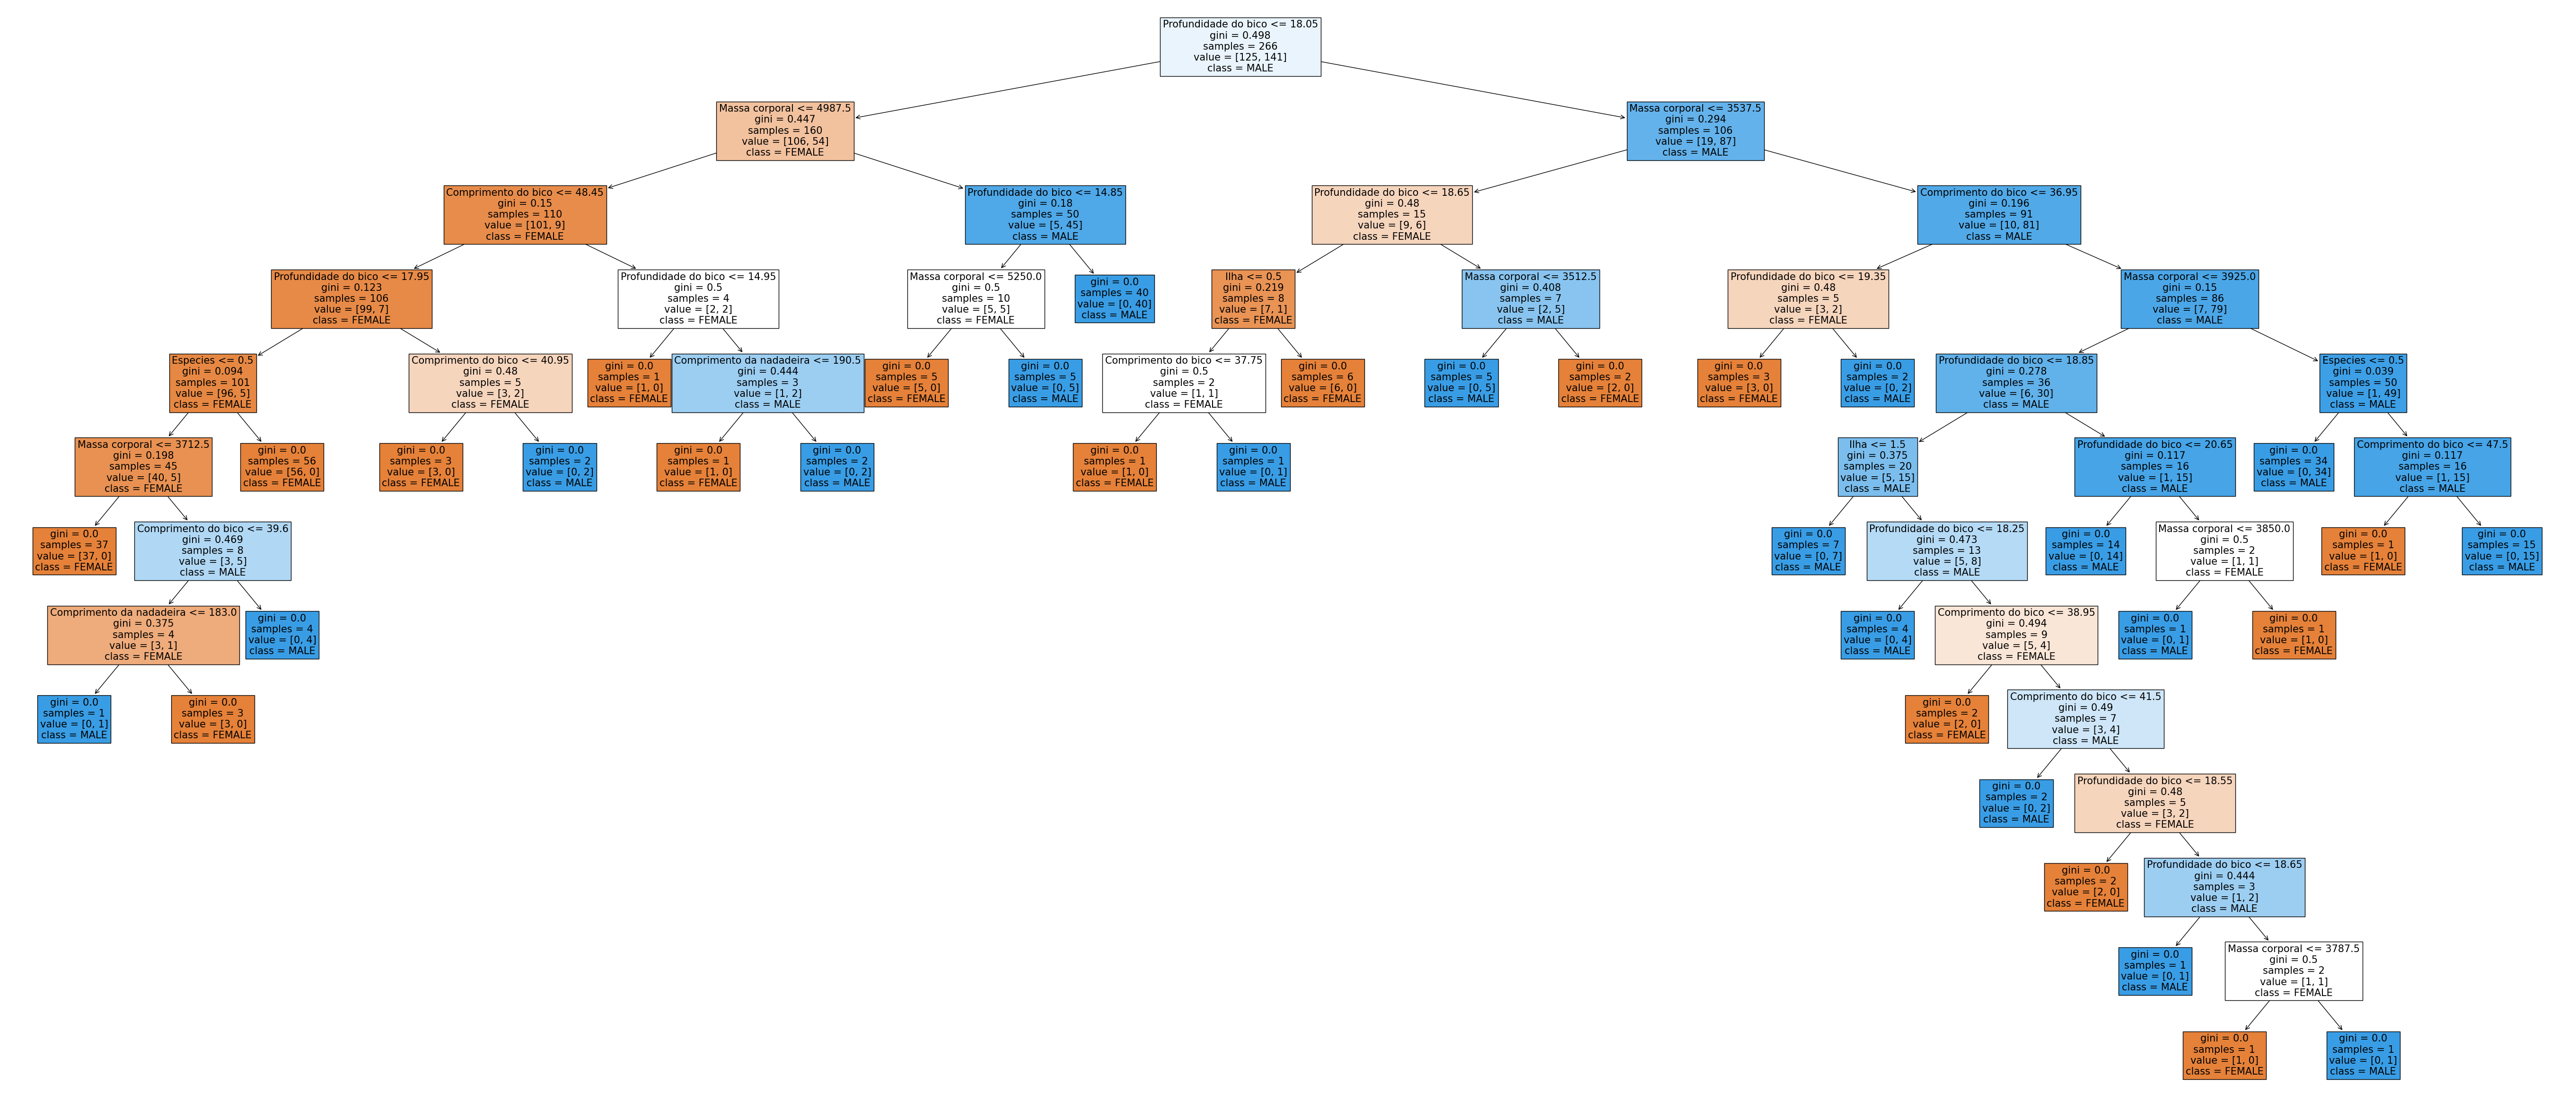

In [15]:
names = ["Especies", "Ilha", "Comprimento do bico","Profundidade do bico","Comprimento da nadadeira","Massa corporal","Sexo"]

# The class names are stored in decision_tree_classifier.classes_, i.e. the classes_ attribute of your DecisionTreeClassifier instance. 
# And the feature names should be the columns of your input dataframe. For your case you will have
feature_names = list(dataframe_penguins.columns)
class_names = model.classes_

# print(tree.export_text(model))
# the good is small size, and big DPI
plt.figure(figsize=(70,30))
tree.plot_tree(model, 
                   feature_names=names,  
                   class_names=class_names,
                   fontsize=15,
                   filled=True)
# plt.savefig('tree_high_dpi', dpi=200)



# Testando a acuracia 

In [14]:
predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions)
score

0.8805970149253731